In [ ]:
import math
import pandas_datareader as web
import numpy as np
import yfinance as yf
import pandas as pd
import os
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load the local CSV file
df = pd.read_csv("/content/'BTCUSDT_1h_data'")

# Assuming the date/timestamp column is named 'timestamp'
# Rename 'timestamp' column to 'Date' if necessary
df.rename(columns={'timestamp': 'Date'}, inplace=True)  # Only run if 'timestamp' is the date column

# Make sure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define your start and end dates
start_date = '2020-12-29'
end_date = '2025-01-31'

# Filter the dataframe based on the date range
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Show the filtered dataframe
df_filtered


,Date,open,high,low,close,volume
7954,2020-12-29 00:00:00,27079.42,27116.78,26758.88,26811.29,2597.820190
7955,2020-12-29 01:00:00,26811.27,26857.01,26636.92,26830.53,2422.604054
7956,2020-12-29 02:00:00,26829.64,26949.07,26727.25,26858.37,1421.315568
7957,2020-12-29 03:00:00,26858.37,26863.07,26433.78,26444.60,3296.209686
7958,2020-12-29 04:00:00,26445.50,26583.65,26203.00,26487.62,4009.670567
...,...,...,...,...,...,...
43759,2025-01-29 11:00:00,102547.01,102809.52,102425.87,102646.00,665.363450
43760,2025-01-29 12:00:00,102646.00,102842.04,102220.13,102229.85,788.663910
43761,2025-01-29 13:00:00,102229.85,102330.81,101699.59,101836.23,1753.231360
43762,2025-01-29 14:00:00,101836.23,102380.00,101582.37,102029.93,1034.806080


In [ ]:
#Get the number of Rows and Columns in the data set
df.shape

(43764, 6)

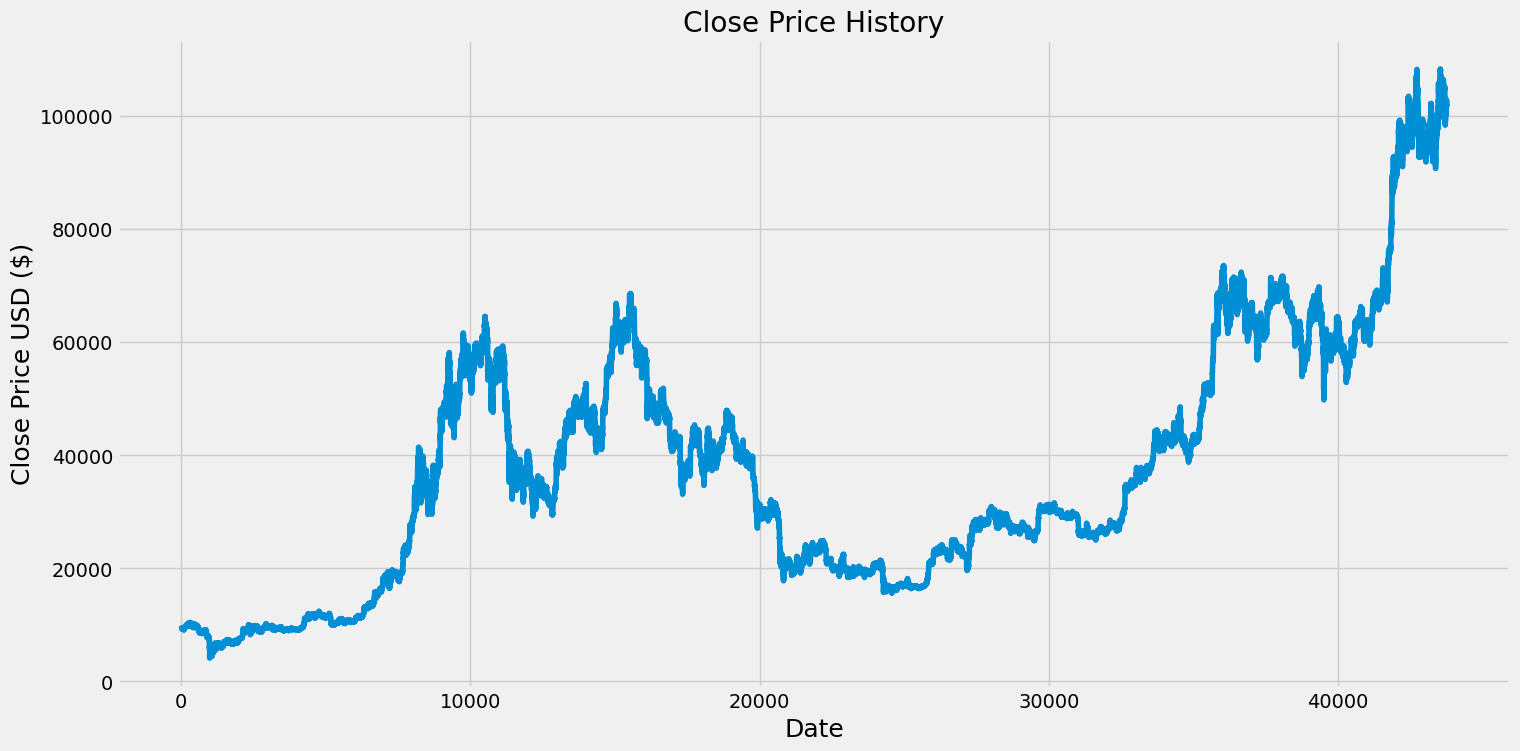

In [ ]:
#visualize the closing prize
plt.figure(figsize=(16,8))
plt.title('Close Price History')
# Check if the column name is 'close' instead of 'Close'
plt.plot(df['close'])  # Changed 'Close' to 'close'
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#create the new data frame with only the 'close column'
data = df[['close']] # Use double brackets to select the column
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len


35012

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0498166 ],
       [0.05025081],
       [0.05059806],
       ...,
       [0.93776928],
       [0.93962839],
       [0.94020215]])

In [ ]:

#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.0498166 , 0.05025081, 0.05059806, 0.05012268, 0.05041234,
       0.05086143, 0.05097679, 0.05088513, 0.05058846, 0.05039362,
       0.05055573, 0.05079568, 0.05042722, 0.05045841, 0.05037856,
       0.05013966, 0.04973079, 0.05005031, 0.05009571, 0.04994051,
       0.0506305 , 0.05039708, 0.05048173, 0.05025897, 0.0503966 ,
       0.05038278, 0.05036243, 0.05042712, 0.04988849, 0.04996469,
       0.04930628, 0.04929668, 0.04982936, 0.04972475, 0.05020138,
       0.05029198, 0.05026828, 0.05038863, 0.05079894, 0.05091594,
       0.05078407, 0.05078589, 0.05102459, 0.05102373, 0.05084118,
       0.05086978, 0.05098514, 0.05094032, 0.05093523, 0.05097315,
       0.05038287, 0.04991747, 0.05068127, 0.0516379 , 0.05034736,
       0.05043653, 0.05050678, 0.05059211, 0.05053011, 0.05026924])]
[0.05029860531837364]

[array([0.0498166 , 0.05025081, 0.05059806, 0.05012268, 0.05041234,
       0.05086143, 0.05097679, 0.05088513, 0.05058846, 0.05039362,
       0.05055573, 0.05079568, 0.05

In [ ]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # Use x_train.shape[0] instead of shape[0]
x_train.shape

(34952, 60, 1)

In [ ]:
#bulid the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False,))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

34952/34952 ━━━━━━━━━━━━━━━━━━━━ 1034s 29ms/step - loss: 1.9768e-04


In [ ]:
#create the texting data set
#create a new scaled values from index 1535 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data set x_test and y_test
x_test = [] # Initialize x_test as a list
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0]) # Append to x_test, not x_train

#convert data to a numpy array
x_test = np.array(x_test) # Convert x_test to a NumPy array after appending

In [ ]:
#convert data to a numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#

In [ ]:
#Get the model predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

274/274 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [ ]:
#Get the root mean squared eror
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

825.1786375257084

<ipython-input-26-40f53fa755f5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])
<ipython-input-26-40f53fa755f5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


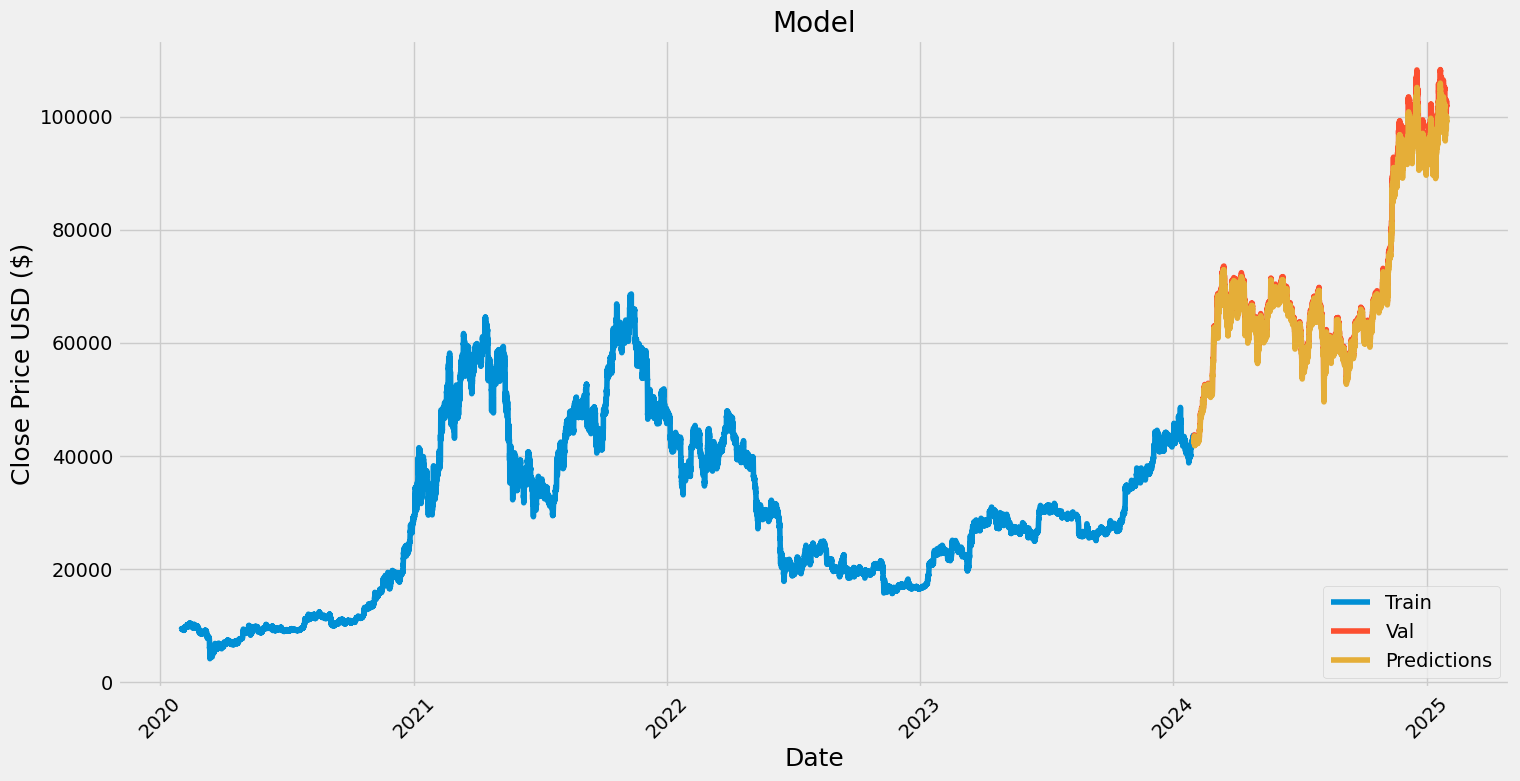

In [ ]:
#create the new data frame with the 'close' and 'Date' columns
data = df[['Date', 'close']]  # Include 'Date' column

#convert the dataframe to a numpy array for the model
dataset = data[['close']].values  # Only use 'close' for the model

# Ensure 'Date' column is in datetime format and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# ... (rest of your code) ...

# Splitting data
train = data[:training_data_len]
valid = data[training_data_len:]

# Assign Predictions
valid['Predictions'] = predictions

# Splitting data
train = data[:training_data_len]

# Visualizing the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot training data
plt.plot(train.index, train['close'])

# Plot validation and predictions
plt.plot(valid.index, valid[['close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
#show the valid and predicted price
valid

,close,Predictions
35012,42933.21,42737.230469
35013,42782.82,42766.656250
35014,42883.00,42580.625000
35015,42930.07,42730.687500
35016,42962.64,42756.074219
...,...,...
43759,102646.00,99874.164062
43760,102229.85,99792.585938
43761,101836.23,99351.140625
43762,102029.93,99042.812500


In [ ]:
# Get the quote
start_date = '2024-01-30'
end_date = '2024-01-30'
apple_quote2 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
print(apple_quote2['close'])


34988    43162.02
Name: close, dtype: float64


In [ ]:
#Define your start and end dates
start_date = '2020-12-29'
end_date = '2025-01-31'

# Filter the data by the given date range
apple_quote = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Select the 'close' column
new_df = apple_quote.filter(['close'])

# Get the last 60 days closing prices and convert to a numpy array
last_60_days = new_df[-60:].values

# Scale the data
last_60_days_scaled = scaler.transform(last_60_days)

# Prepare x_test by adding the past 60 days scaled data
x_test = []
x_test.append(last_60_days_scaled)

#convert data to a numpy array before reshaping
x_test = np.array(x_test) # convert x_test to numpy array

# Reshape for model input
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predict the scaled price using the model
pred_price = model.predict(x_test)

# Undo the scaling to get the original price
pred_price = scaler.inverse_transform(pred_price)

# Output the predicted price
print(pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[99320.14]]
